# Artificial Intelligence Mini Individual Project
### Naufal Andila Fauzan | 2099987 | 16 Jan 2023

#### Importing Relevant Libraries
We are using numpy, and sklearn to calculate the mathematical and statistical concept, matplotlib.pyplot to create the visualization of plot, and from torchvision.datasets we import the dataset we want to use, MNIST Dataset, and importing module Lambda from transform class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier

from torchvision.datasets import MNIST
from torchvision.transforms import Lambda

#### Load the MNIST Dataset
Load the mnist data and retriving it by load the training and testing set which we has already splitted, we only need to call it and put it into our own variable, so mnist_tr for training and mnist_te for testing


In [2]:
%%capture
mnist_tr = MNIST(root="../mnist", train=True, download=True)
mnist_te = MNIST(root="../mnist", train=False, download=True)

In [3]:
mnist_tr, mnist_tr_labels = mnist_tr.data.numpy(), mnist_tr.targets.numpy()
mnist_te, mnist_te_labels = mnist_te.data.numpy(), mnist_te.targets.numpy()

#### Reshape and Normalized the Matrices
Reshaping the 28 x 28 matrices both drom the test and training set into one dimensional input vector using reshape function then normalized value to 0-1 by dividing it by 255

In [4]:
x_tr = mnist_tr.reshape(60000, 28 * 28)
x_te = mnist_te.reshape(10000, 28 * 28)

In [5]:
x_tr = x_tr / 255
x_te = x_te / 255

#### Example on MNIST

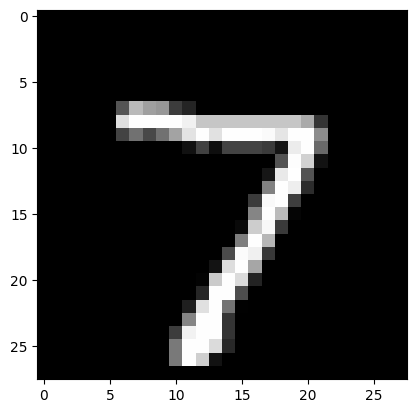

In [6]:
_ = plt.imshow(x_te[0].reshape(28, 28), cmap="gray")


### 1. How does the recognition accuracy change in the test set if the images are corrupted with a certain level of noise?




Since we are trying to see the corelation between recognition accuracy and noise level, we can inject noise into the test images by adding a (Gaussian) random matrix to the data:

In [7]:
MLP1 = MLPClassifier(hidden_layer_sizes=(500, 500), #in this notebook, i make different MLP for every question to avoid wrong MLP used
                    max_iter = 10,
                    random_state=42)

In [8]:
MLP1 = MLP1.fit(x_tr, mnist_tr_labels) #fit the MLP to the training label

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
def mlpScore(noise_level): #creating function to calculate accuracy based on the noise level as the parameter and shows the visualization
  x_te_noisy = x_te + np.random.normal(loc = 0, scale = noise_level, size = (1, 28 * 28)) #inject noise to test set
  x_te_noisy = np.clip(x_te_noisy,0,1)
  _ = plt.imshow(x_te_noisy[0].reshape(28, 28), cmap="gray")
  print(f"Accuracy of the model for {noise_level} noise level is {MLP1.score(x_te_noisy, mnist_te_labels)}")

Accuracy of the model for 0.1 noise level is 0.9751


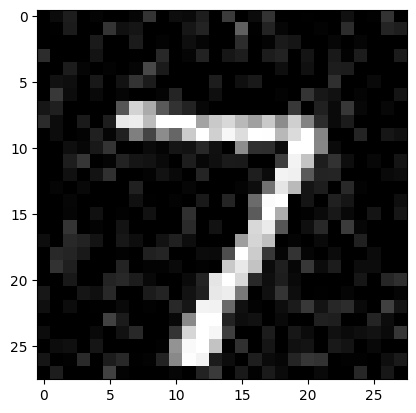

In [10]:
mlpScore(0.1) #calculate the accuracy using mlpScore function with noise as the parameters, which in this case 0.1 noise level

Accuracy of the model for 0.2 noise level is 0.9437


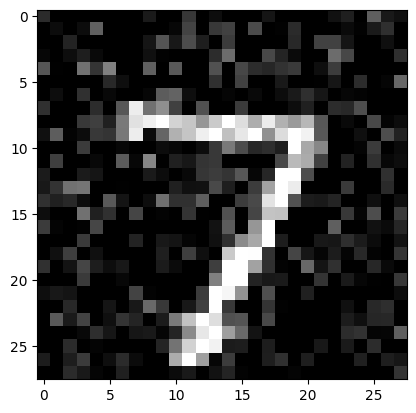

In [11]:
mlpScore(0.2) #calculate the accuracy using mlpScore function with noise as the parameters, which in this case 0.2 noise level

Accuracy of the model for 0.3 noise level is 0.7832


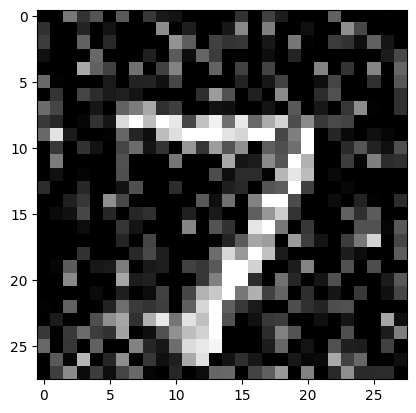

In [12]:
mlpScore(0.3) #calculate the accuracy using mlpScore function with noise as the parameters, which in this case 0.3 noise level

Accuracy of the model for 0.5 noise level is 0.5109


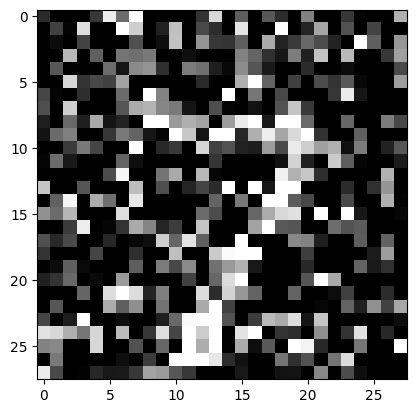

In [13]:
mlpScore(0.5) #calculate the accuracy using mlpScore function with noise as the parameters, which in this case 0.5 noise level

Accuracy of the model for 0.9 noise level is 0.276


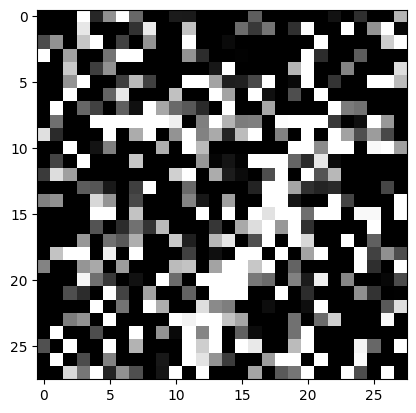

In [14]:
mlpScore(0.9) #calculate the accuracy using mlpScore function with noise as the parameters, which in this case 0.9 noise level

The result:

| Noise Level | Accuracy |
|----------|----------|
|   0.1   |   0.9736   |
|   0.2   |   0.9531   |
|   0.3   |   0.8302   |
|   0.5   |   0.5301   |
|   0.9   |   0.3646   |


And to answer the question of "How does the recognition accuracy change in the test set if the images are corrupted with a certain level of noise?"

We can conclude that everytime **the images get corrupted with even bigger noise, the model accuracy level is going to decreased**, for example it starts from 0.971 accuracy for 0.1 noise level to only as little as 0.292 accuracy level when we gave them 0.9 noise level


### 2. What are the most challenging digits to recognize when noise is added to the test stimuli? Visualize some examples of misclassified noisy patterns.

In [15]:
noise_level = 0.2 #set noise level to 0.2
x_te_noisy2 = x_te + np.random.normal(loc = 0, scale = noise_level, size = (1, 28 * 28)) #injecting noise, i also name code the test set noise with number of the question
x_te_noisy2 = np.clip(x_te_noisy2,0,1)

In [16]:
MLP2 = MLPClassifier(hidden_layer_sizes=(500, 500), #creating MLP2 for the second question
                    max_iter = 10,
                    random_state=42)

In [17]:
MLP2 = MLP2.fit(x_tr, mnist_tr_labels) #fit the MLP2 to the training label

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


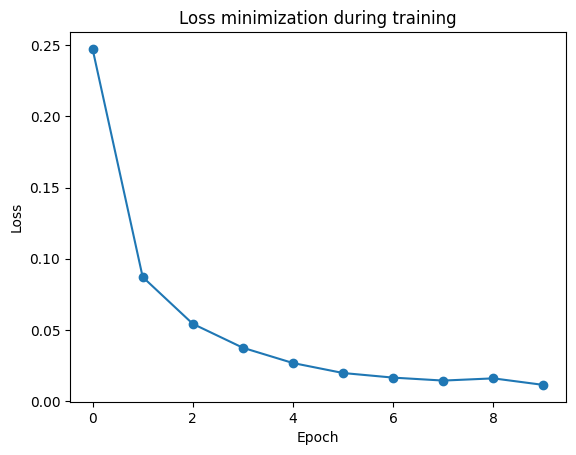

In [18]:
_ = plt.plot(range(MLP2.n_iter_), MLP2.loss_curve_, marker='o')
_ = plt.xlabel("Epoch")
_ = plt.ylabel("Loss")
_ = plt.title("Loss minimization during training")

In [19]:
MLP2.score(x_te_noisy2, mnist_te_labels) #calculate the accuracy for model that has been using test set that has been injected by 0.2 noise

0.9365

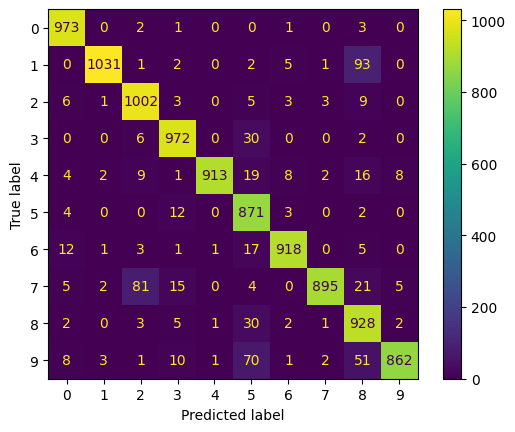

In [20]:
x_te_predictions = MLP2.predict(x_te_noisy2)
_ = metrics.ConfusionMatrixDisplay.from_predictions(mnist_te_labels, x_te_predictions)

The result:

| True Label | Predicted Label |
|----------|----------|
|   0   |   973   |
|   1   |   1091  |
|   2   |   1021   |
|   3   |   978   |
|   4   |   919   |
|   5   |   ***871***  |
|   6   |   904  |
|   7   |   ***765***   |
|   8   |   953   |
|   9   |   ***863***   |



Based on the confusion matrix above, it shows that digit 7, 9, and 5 are the most challenging digits to recognize when noise is added to the test stimuli.

### 3.What is the impact of noise on recognition accuracy? Systematically investigate this phenomenon by creating a psychometric function where accuracy is plotted against stimulus visibility / noise level.

In [21]:
MLP3 = MLPClassifier(hidden_layer_sizes=(500, 500), #creating MLP3 for the third question
                    max_iter = 10,
                    random_state=42)

In [22]:
MLP3 = MLP3.fit(x_tr, mnist_tr_labels) #fit the MLP3 to the training label

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
def mlpScore(noise_level):  #creating function to calculate accuracy based on the noise level as the parameter
  x_te_noisy = x_te + np.random.normal(loc = 0, scale = noise_level, size = (1, 28 * 28))
  x_te_noisy = np.clip(x_te_noisy,0,1)
  print(f"Accuracy of the model for {noise_level} noise level is {MLP1.score(x_te_noisy, mnist_te_labels)}")

In [24]:
noise_level = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #Create list of noise level we want to check the accuracy from
score = [] #empty list to put the accuracy result
noiseCounter = 0 #noise counter as it will progressed from the loop
for noise in noise_level: #loop that will print noise level based on var noise_level and calculate accuracy based on mlpScore function
  #print(f"Noise level: {noise_level[noiseCounter]}")
  if noiseCounter < len(noise_level):
          noiseCounter += 1 #every time loop will add the noiseCounter by 1
          def mlpScore(noise, x_te, MLP3, mnist_te_labels): #accuracy  function
            x_te_noisy = x_te + np.random.normal(loc=0, scale=noise, size=(len(x_te), 28 * 28))
            x_te_noisy = np.clip(x_te_noisy, 0, 1)
            return MLP3.score(x_te_noisy, mnist_te_labels)

          accuracy = mlpScore(noise, x_te, MLP3, mnist_te_labels)
          score.append((noise, accuracy)) #for each noise level in your loop, keep track of the noise level and the corresponding accuracy in a tuple and adding that pair to the score list.

          print(f"Accuracy for noise level {noise}: {accuracy}") #print loop based on the noise level and calculated accuracy

Accuracy for noise level 0.1: 0.9719
Accuracy for noise level 0.2: 0.9193
Accuracy for noise level 0.3: 0.753
Accuracy for noise level 0.4: 0.604
Accuracy for noise level 0.5: 0.4981
Accuracy for noise level 0.6: 0.4139
Accuracy for noise level 0.7: 0.3546
Accuracy for noise level 0.8: 0.3118
Accuracy for noise level 0.9: 0.2689


#### Psychometric function that plot accuracy against stimulus visibility / noise level:



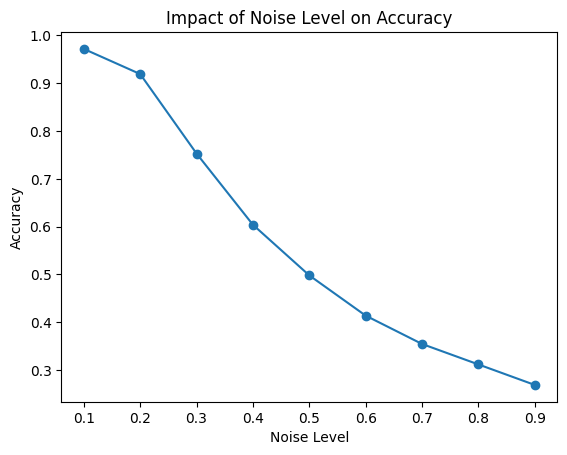

In [25]:
noise_levels, accuracies = zip(*score)
_ = plt.plot(noise_levels, accuracies, marker='o')
_ = plt.xlabel("Noise Level")
_ = plt.ylabel("Accuracy")
_ = plt.title("Impact of Noise Level on Accuracy")
plt.show()

### 4. Is it possible to improve recognition accuracy on the test set by adding noise also to the training patterns? Show some simulations supporting your conclusions.

#### First Test

In [26]:
noise_level = 0.2 #set noise level 0.2
x_tr_noisy4 = x_tr + np.random.normal(loc = 0, scale = noise_level, size = (1, 28 * 28)) #inject noise to train set
x_tr_noisy4 = np.clip(x_tr_noisy4,0,1)

x_te_noisy4 = x_te + np.random.normal(loc = 0, scale = noise_level, size = (1, 28 * 28)) #inject noise to test set
x_te_noisy4 = np.clip(x_te_noisy4,0,1)

Let's visualize the first test pattern that contains noise:

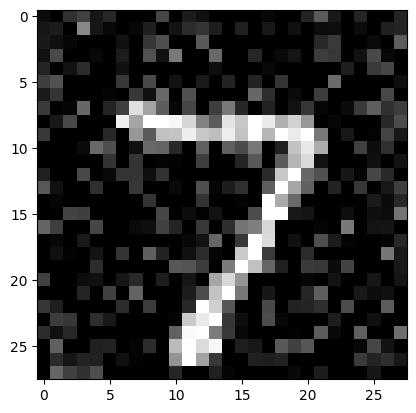

In [27]:
_ = plt.imshow(x_te_noisy4[0].reshape(28, 28), cmap="gray")

In [28]:
MLP4 = MLPClassifier(hidden_layer_sizes=(500, 500), #creating MLP4 for the fourth question
                    max_iter = 10, #with 10 iteration
                    random_state=42)

In [29]:
MLP4 = MLP4.fit(x_tr_noisy4, mnist_tr_labels) #fit the MLP4 to the training label

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


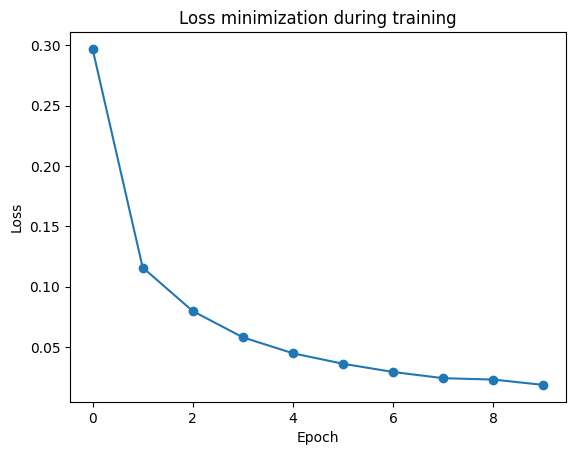

In [30]:
#plot the error curve
_ = plt.plot(range(MLP4.n_iter_), MLP4.loss_curve_, marker='o')
_ = plt.xlabel("Epoch")
_ = plt.ylabel("Loss")
_ = plt.title("Loss minimization during training")

In [31]:
#calculate the accuracy for model that has been using test set and training set that has been injected by 0.2 noise
MLP4.score(x_te_noisy4, mnist_te_labels)

0.9611

Based on the first test, when we inject noise to both training and test set, the accuracy score is actually improving if we are comparing it to the second question which only inject noise to the test set.

| Condition | Accuracy Score |
|----------|----------|
|   Only test set injected (based on 2nd question)   |   0.9338   |
|   Both test and train set injected   |   0.9607  |


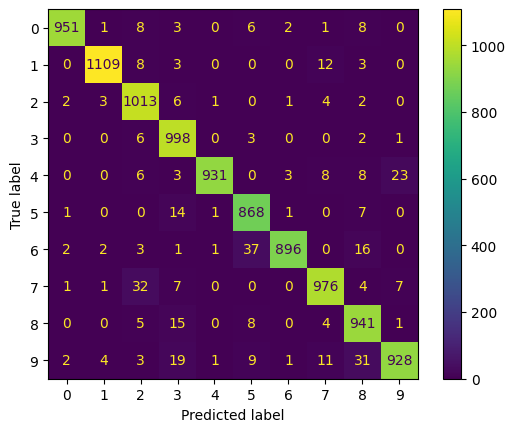

In [32]:
#generate confsuion matrix for MLP4
x_te_predictions = MLP4.predict(x_te_noisy4)
_ = metrics.ConfusionMatrixDisplay.from_predictions(mnist_te_labels, x_te_predictions)

#### Second Test

In [33]:
#second test
noise_level = 0.2
x_tr_noisy5 = x_tr + np.random.normal(loc = 0, scale = noise_level, size = (1, 28 * 28))
x_tr_noisy5 = np.clip(x_tr_noisy5,0,1)

x_te_noisy5 = x_te + np.random.normal(loc = 0, scale = noise_level, size = (1, 28 * 28))
x_te_noisy5 = np.clip(x_te_noisy5,0,1)

MLP5 = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 10,
                    random_state=42)

MLP5 = MLP5.fit(x_tr_noisy5, mnist_tr_labels)

MLP5.score(x_te_noisy5, mnist_te_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.947

However, when i tried again and making it as MLP5, i actually got totally different result which a decrease on accuracy score

| Condition | Accuracy Score |
|----------|----------|
|   Only test set injected (based on 2nd question)   |   0.9338   |
|   Both test and train set injected (1st test)   |   0.9607  |
|   Both test and train set injected (2nd test)  |   0.8999  |


So the conclusion from our experiment is that IT IS possible to improve recognition accuracy on the test set by adding noise to both the training and test set

first experiment with the noise level of 0.2 applied to both training and test set with 2 hidden layer and 10 iteration resulting accuracy of 0.9607

While in the second experiment,  a similar noise level of 0.2 applied to both train set and test set with 2 hidden layer, 10 iteration resulting accuracy of 0.9607, reinforcing the initial observation.

These results indicating that controlled noise injection during training can enhance the model's ability to generalize to noisy test data.